<a href="https://colab.research.google.com/github/SingamSaiVaraPrasad/test_files/blob/master/logisticReg_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

<Axes: xlabel='x1', ylabel='x2'>

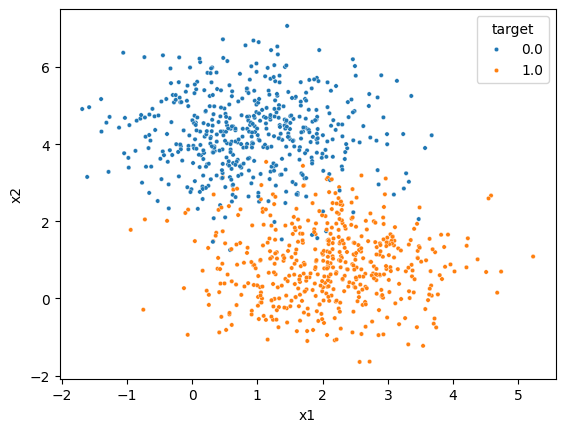

In [ ]:
x,y=make_blobs(n_samples=1000,centers=2,n_features=2,random_state=0) #creates blobs with num of samples and centres
newd=np.concatenate((x,y.reshape(-1,1)),axis=1)
df=pd.DataFrame(newd,columns=['x1','x2','target'])
sns.scatterplot(data=df,x='x1',y='x2',hue='target',s=10)

In [ ]:
def sigma(z):
  return 1/(1+np.exp(-z))
def hypothesis(x,w):
  return sigma(np.dot(x,w))
def bin_cross_entropy(y,y_hat,w):
  y_hat=hypothesis(np.array(x),w)
  totloss =-y*np.log(y_hat)-(1-y)*np.log(1-y_hat)
  loss=np.mean(totloss)
  return loss


In [ ]:
def gradient(x,y,w):
  return np.dot(x.T,hypothesis(x,w)-y)/x.shape[0]

def grad_descent(x,y,epochs,lr):
  m,n=x.shape
  w=np.zeros(n,)
  error=[]
  for i in range(epochs):
    y_hat=hypothesis(x,w)
    laas=bin_cross_entropy(y,y_hat,w)
    error.append(laas)
    grad=gradient(x,y,w)
    w=w-lr*grad
  return w,error

newcpy=df.copy()
newcpy.insert(0,'constant',(np.ones(shape=(df.shape[0],1))))
X = newcpy.drop('target', axis=1)
y = newcpy['target']

theta, error = grad_descent(X, y, 10000,0.1)

[ 6.40438387  0.85948565 -2.95962436] 0.10464193323189752


Text(0, 0.5, 'loss')

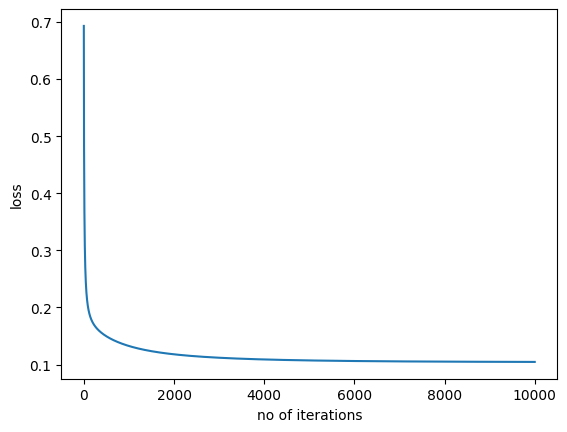

In [ ]:
print(theta,error[-1])
plt.plot(error)
plt.xlabel('no of iterations')
plt.ylabel('loss')

<Axes: xlabel='x1', ylabel='x2'>

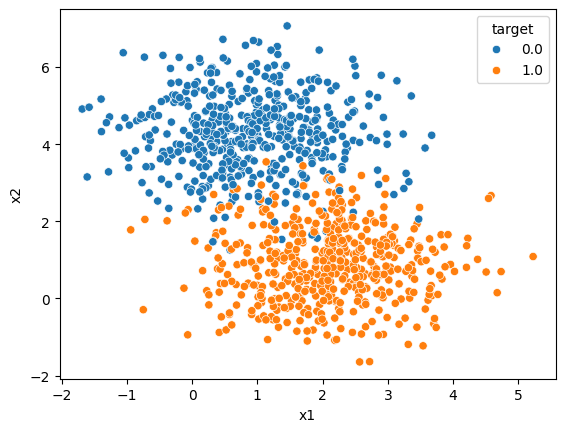

In [ ]:
sns.scatterplot(data=df,x='x1',y='x2',hue='target')
x1=df['x1'].min()
x2=df['x2'].min()


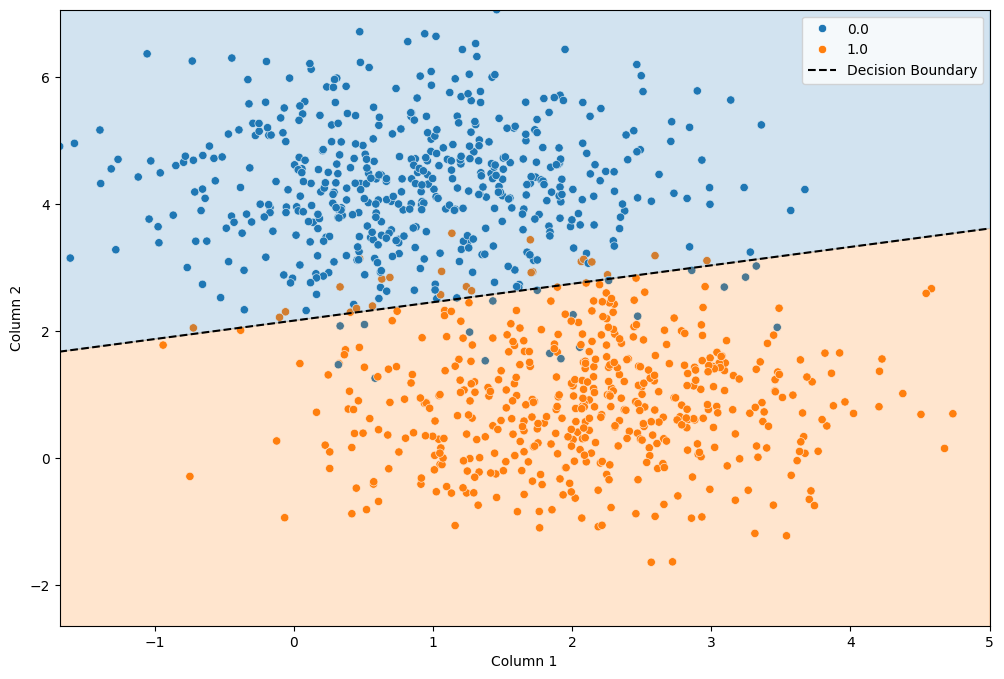

In [ ]:

x_vals = np.array([-2, 5])
slope = - theta[1] / theta[2]
intercept = - theta[0] / theta[2]
decision_boundary = slope * x_vals + intercept
x1_min = df['x1'].min()
x1_max = df['x1'].max()
x2_min = df['x2'].min()
x2_max = df['x2'].max()

# Plot the dataset with decision bounddart
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='x1', y='x2', hue='target')
plt.plot(x_vals, decision_boundary, linestyle='--', color='black', label='Decision Boundary')
plt.fill_between(x_vals, decision_boundary, x2_min-10, color='tab:orange', alpha=0.2)
plt.fill_between(x_vals, decision_boundary, x2_max+10, color='tab:blue', alpha=0.2)
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.ylim(x2_min-1, x2_max)
plt.xlim(x1_min, 5)
plt.legend(loc='best')
plt.show()

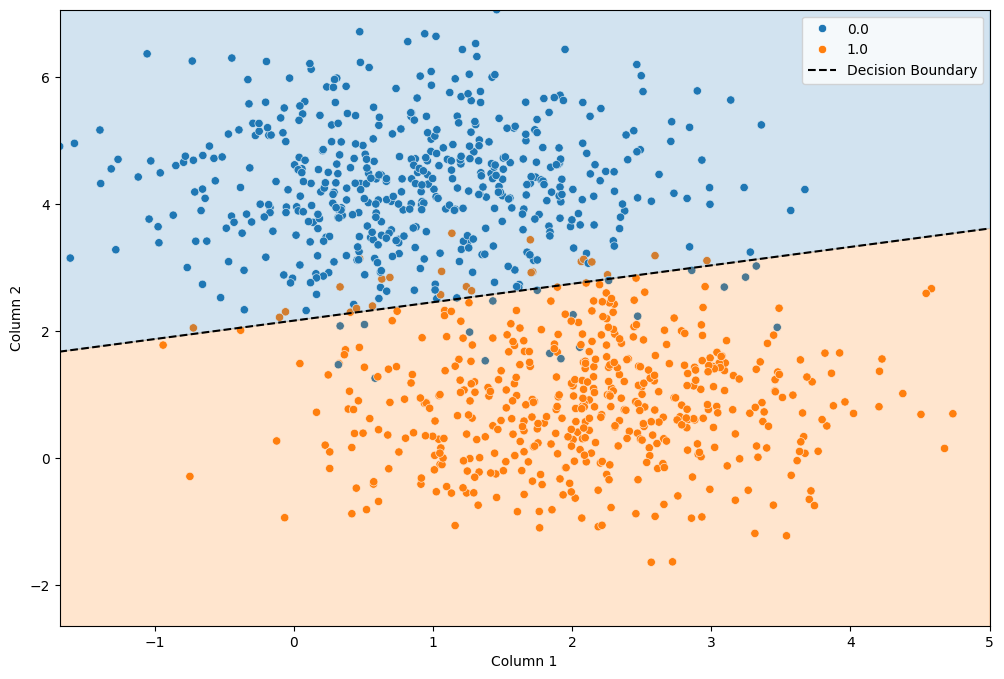

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)
slope=lr.coef_[0][0]
intercept=lr.intercept_[0]



x_vals = np.array([-2, 5])
slope = - theta[1] / theta[2]
intercept = - theta[0] / theta[2]
decision_boundary = slope * x_vals + intercept
x1_min = df['x1'].min()
x1_max = df['x1'].max()
x2_min = df['x2'].min()
x2_max = df['x2'].max()

# Plot the dataset with decision bounddart
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='x1', y='x2', hue='target')
plt.plot(x_vals, decision_boundary, linestyle='--', color='black', label='Decision Boundary')
plt.fill_between(x_vals, decision_boundary, x2_min-10, color='tab:orange', alpha=0.2)
plt.fill_between(x_vals, decision_boundary, x2_max+10, color='tab:blue', alpha=0.2)
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.ylim(x2_min-1, x2_max)
plt.xlim(x1_min, 5)
plt.legend(loc='best')
plt.show()